# Weatherpy

## Analysis
* As shown in the Max Temperature vs. Latitude Plot, one can clearly see that the temperature recorded in cities gradually reaches a peak as one travels from one pole of the planet to the other; in other words, the planet is warmer along its equator.
* Upon analysis of the Wind Speed and Cloudiness, it would seem that there is little to no correlation between Latitude and Wind Speed or Cloudiness. However, it would appear that towards the equator, there is more moisture in the air, as shown in the Humidity vs. Latitude Plot. When examining the plot, there is almost always a gap near the equatorial Latitude (0) on the scatter plot due to cities on, or near, the equator having high humidity.
* One issue with this method of analysis is that not all cities have data collected from the openweathermap api and as a result, one should have a buffer zone of approximately 100 for a sample size of 500. To resolve this, one could generate cities and call their data while simultaneously checking if the city exists in the database. From there a flag could be raised and an if-else construct could be used to filter out the cities that don't have data and replace them with one that does.

In [1]:
from citipy import citipy
import random
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
from configweather import api_key

## Generate Cities List
Something to keep in mind when doing this analysis was the distribution of land, and therefore cities, on the planet. For example, Earth is very "top-heavy" in the sense that "land areas are distributed predominantly in the Northern Hemisphere (68%) relative to the Southern Hemisphere (32%) as divided by the equator" (http://phl.upr.edu/library/notes/distributionoflandmassesofthepaleo-earth). A similar behavior is exhibited when comparing the Eastern and Western Hemispheres as well, with the East having nearly double that of the West. This can create a skewed analysis due to the fact that a majority of cities would be expected to be in the hemispheres with the greatest amount of land. I've combatted this bias by implementing a simple "if-elseif" construct to sample the 4 quadrants of the world for cities.

To avoid duplicate cities, I've implemented an if-statement which checks if the newly generated city is already in the cities list, if so it won't append the duplicate to the list.

In [2]:
cities = []
samplesize = 700
i = 0

def generate_city(latitude, longitude):
    while(True):
        city = citipy.nearest_city(lat, lon)
        cityname = city.city_name
        if (~(cityname in cities)):
            cities.append(cityname)
            break


while (i < samplesize):
    if i < (samplesize/4) :
        lat = random.randint(-90,0)
        lon = random.randint(-180,0)
    elif i < (samplesize/2):
        lat = random.randint(0,90)
        lon = random.randint(-180,0)
    elif i < (samplesize*(3/4)):
        lat = random.randint(-90,0)
        lon = random.randint(0,180)
    else:
        lat = random.randint(0,90)
        lon = random.randint(0,180)
    generate_city(lat, lon)
    i = i + 1

## Perform API Calls

In [3]:
weather_data = []
counter = 1
settings = {"units": "metric", "appid": api_key}
print("Beginning Data Retrieval\n------------------------")
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
for city in cities:    
    print(f"Processing city {counter} of {samplesize} | {city}")
    cityjoined = "_".join(city.split())
    counter = counter + 1
    try:
        weather_data.append(ow.get_current(city, **settings))
        query_url = f"{url}appid={api_key}&q={cityjoined}&units={units}"
        print(query_url)
    except:
        print(f"Data for {city} not found.")
        
print("------------------------\nData Retrieval Complete\n------------------------")

Beginning Data Retrieval
------------------------
Processing city 1 of 700 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=mataura&units=metric
Processing city 2 of 700 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=georgetown&units=metric
Processing city 3 of 700 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=mar_del_plata&units=metric
Processing city 4 of 700 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=ushuaia&units=metric
Processing city 5 of 700 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=ushuaia&units=metric
Processing city 6 of 700 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=jamestown&units=metric
Processing city 7 of 700 | ushuaia
http://api.openweathermap.org

Data for vaitupu not found.
Processing city 58 of 700 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=rikitea&units=metric
Processing city 59 of 700 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=rikitea&units=metric
Processing city 60 of 700 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=jamestown&units=metric
Processing city 61 of 700 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=punta_arenas&units=metric
Processing city 62 of 700 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=laguna&units=metric
Processing city 63 of 700 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=punta_arenas&units=metric
Processing city 64 of 700 | chuy
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=cape_town&units=metric
Processing city 115 of 700 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=lebu&units=metric
Processing city 116 of 700 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=ushuaia&units=metric
Processing city 117 of 700 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=ushuaia&units=metric
Processing city 118 of 700 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=avarua&units=metric
Processing city 119 of 700 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=rikitea&units=metric
Processing city 120 of 700 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=mataura&units=metric
Processing city 121 o

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=avarua&units=metric
Processing city 172 of 700 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=atuona&units=metric
Processing city 173 of 700 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=mar_del_plata&units=metric
Processing city 174 of 700 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=ushuaia&units=metric
Processing city 175 of 700 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=jamestown&units=metric
Processing city 176 of 700 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=thompson&units=metric
Processing city 177 of 700 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=aklavik&units=metric


Data for vaitupu not found.
Processing city 231 of 700 | whitehorse
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=whitehorse&units=metric
Processing city 232 of 700 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=hilo&units=metric
Processing city 233 of 700 | rincon
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=rincon&units=metric
Processing city 234 of 700 | illoqqortoormiut
Data for illoqqortoormiut not found.
Processing city 235 of 700 | illoqqortoormiut
Data for illoqqortoormiut not found.
Processing city 236 of 700 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=hilo&units=metric
Processing city 237 of 700 | lompoc
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=lompoc&units=metric
Processing city 238 of 700 | illoqqortoormiut
Data for illoqqortoormiut not found.
Pro

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=ullapool&units=metric
Processing city 289 of 700 | camacha
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=camacha&units=metric
Processing city 290 of 700 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=tuktoyaktuk&units=metric
Processing city 291 of 700 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=nanortalik&units=metric
Processing city 292 of 700 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=los_llanos_de_aridane&units=metric
Processing city 293 of 700 | york
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=york&units=metric
Processing city 294 of 700 | provideniya
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=atuona&units=metric
Processing city 348 of 700 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=atuona&units=metric
Processing city 349 of 700 | todos santos
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=todos_santos&units=metric
Processing city 350 of 700 | egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=egvekinot&units=metric
Processing city 351 of 700 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=busselton&units=metric
Processing city 352 of 700 | manono
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=manono&units=metric
Processing city 353 of 700 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=hobart&units=metric
Proc

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=esperance&units=metric
Processing city 406 of 700 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=port_alfred&units=metric
Processing city 407 of 700 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=flinders&units=metric
Processing city 408 of 700 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=hobart&units=metric
Processing city 409 of 700 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=victoria&units=metric
Processing city 410 of 700 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=new_norfolk&units=metric
Processing city 411 of 700 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=hithadhoo&unit

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=saint-philippe&units=metric
Processing city 465 of 700 | albany
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=albany&units=metric
Processing city 466 of 700 | caconda
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=caconda&units=metric
Processing city 467 of 700 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=bluff&units=metric
Processing city 468 of 700 | palabuhanratu
Data for palabuhanratu not found.
Processing city 469 of 700 | gombong
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=gombong&units=metric
Processing city 470 of 700 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=saint-philippe&units=metric
Processing city 471 of 700 | new norfolk
http://api.openweathermap.or

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=mitsamiouli&units=metric
Processing city 524 of 700 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=esperance&units=metric
Processing city 525 of 700 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=hobart&units=metric
Processing city 526 of 700 | aakirkeby
Data for aakirkeby not found.
Processing city 527 of 700 | belushya guba
Data for belushya guba not found.
Processing city 528 of 700 | godinesti
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=godinesti&units=metric
Processing city 529 of 700 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=katsuura&units=metric
Processing city 530 of 700 | kushmurun
Data for kushmurun not found.
Processing city 531 of 700 | miri
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=dikson&units=metric
Processing city 589 of 700 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=longyearbyen&units=metric
Processing city 590 of 700 | nahrin
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=nahrin&units=metric
Processing city 591 of 700 | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=talnakh&units=metric
Processing city 592 of 700 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=victoria&units=metric
Processing city 593 of 700 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=khatanga&units=metric
Processing city 594 of 700 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=butaritari&units=metri

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=zhezkazgan&units=metric
Processing city 651 of 700 | pafos
Data for pafos not found.
Processing city 652 of 700 | vanavara
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=vanavara&units=metric
Processing city 653 of 700 | konstantinovka
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=konstantinovka&units=metric
Processing city 654 of 700 | yaan
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=yaan&units=metric
Processing city 655 of 700 | pasni
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=pasni&units=metric
Processing city 656 of 700 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=dikson&units=metric
Processing city 657 of 700 | tezu
http://api.openweathermap.org/data/2.5/weather?appid=da015c

In [4]:
summary = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed"]
data = [response(*summary) for response in weather_data]
column_names = ["City", "Cloudiness", "Country", "Date", "Humidity", "Latitude", "Longitude", "Max Temperature","Wind Speed"]
weather_data = pd.DataFrame(data, columns=column_names)
weather_data.to_csv("weather_data.csv", sep=',', encoding='utf-8', index = False)
weather_data.count()

City               627
Cloudiness         627
Country            627
Date               627
Humidity           627
Latitude           627
Longitude          627
Max Temperature    627
Wind Speed         627
dtype: int64

In [5]:
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Mataura,0,NZ,1527822010,73,-46.19,168.86,7.73,2.06
1,Georgetown,75,GY,1527818400,94,6.80,-58.16,25.00,2.10
2,Mar del Plata,0,AR,1527821878,100,-46.43,-67.52,-4.57,1.76
3,Ushuaia,20,AR,1527818400,70,-54.81,-68.31,6.00,16.50
4,Ushuaia,20,AR,1527818400,70,-54.81,-68.31,6.00,16.50
5,Jamestown,44,AU,1527821945,51,-33.21,138.60,13.83,4.06
6,Ushuaia,20,AR,1527818400,70,-54.81,-68.31,6.00,16.50
7,Coquimbo,0,CL,1527818400,87,-29.95,-71.34,10.00,0.50
8,Rikitea,8,PF,1527821939,100,-23.12,-134.97,24.53,0.86
9,Avarua,75,CK,1527818400,88,-21.21,-159.78,25.00,2.10


# Max Temperature vs. Latitude Plot

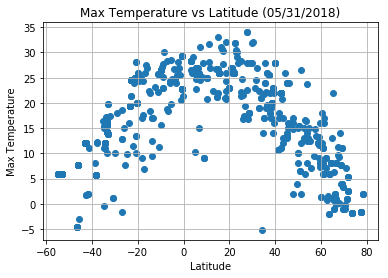

In [6]:
import datetime
date = datetime.datetime.fromtimestamp(int(weather_data["Date"][0])).strftime('%m/%d/%Y')

temps = weather_data["Max Temperature"]
lat = weather_data["Latitude"]
plt.scatter(x = lat, y = temps, marker="o")
plt.grid()
plt.title(f"Max Temperature vs Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

# Humidity vs. Latitude Plot

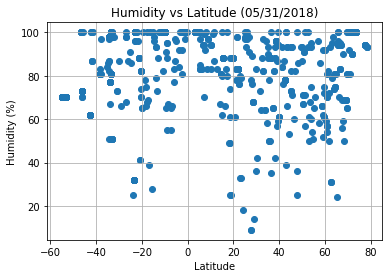

In [7]:
humid = weather_data["Humidity"]
plt.scatter(x = lat, y = humid, marker="o")
plt.grid()
plt.title(f"Humidity vs Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# Cloudiness vs. Latitude Plot

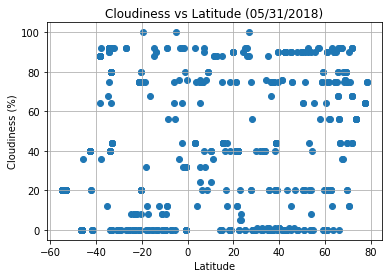

In [8]:
cloudy = weather_data["Cloudiness"]
plt.scatter(x = lat, y = cloudy, marker="o")
plt.grid()
plt.title(f"Cloudiness vs Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

# Wind Speed vs. Latitude Plot

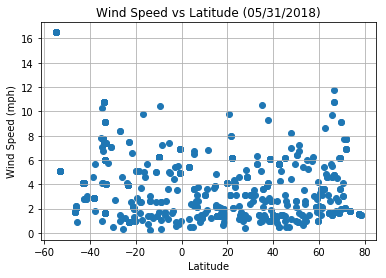

In [9]:
windspd = weather_data["Wind Speed"]
plt.scatter(x = lat, y = windspd, marker="o")
plt.grid()
plt.title(f"Wind Speed vs Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()